# PHYS3888 Computer Lab: Building Learning Machines

In this tutorial, we'll explore two key components of this week's lectures:

1. How to train a simple model neuron to perform classification.
2. How memories can be stored in inter-connected neural networks.

## PART 1: Classification with a single neuron

### Weight space of a single neuron

Recall that we can use a sigmoidal function to map a neuron's activation to its output, `y` (we saw this in the Dynamics Module).

So let's first get an intuition for how this mapping from a set of inputs, `x`, to an output, `y`, behaves:
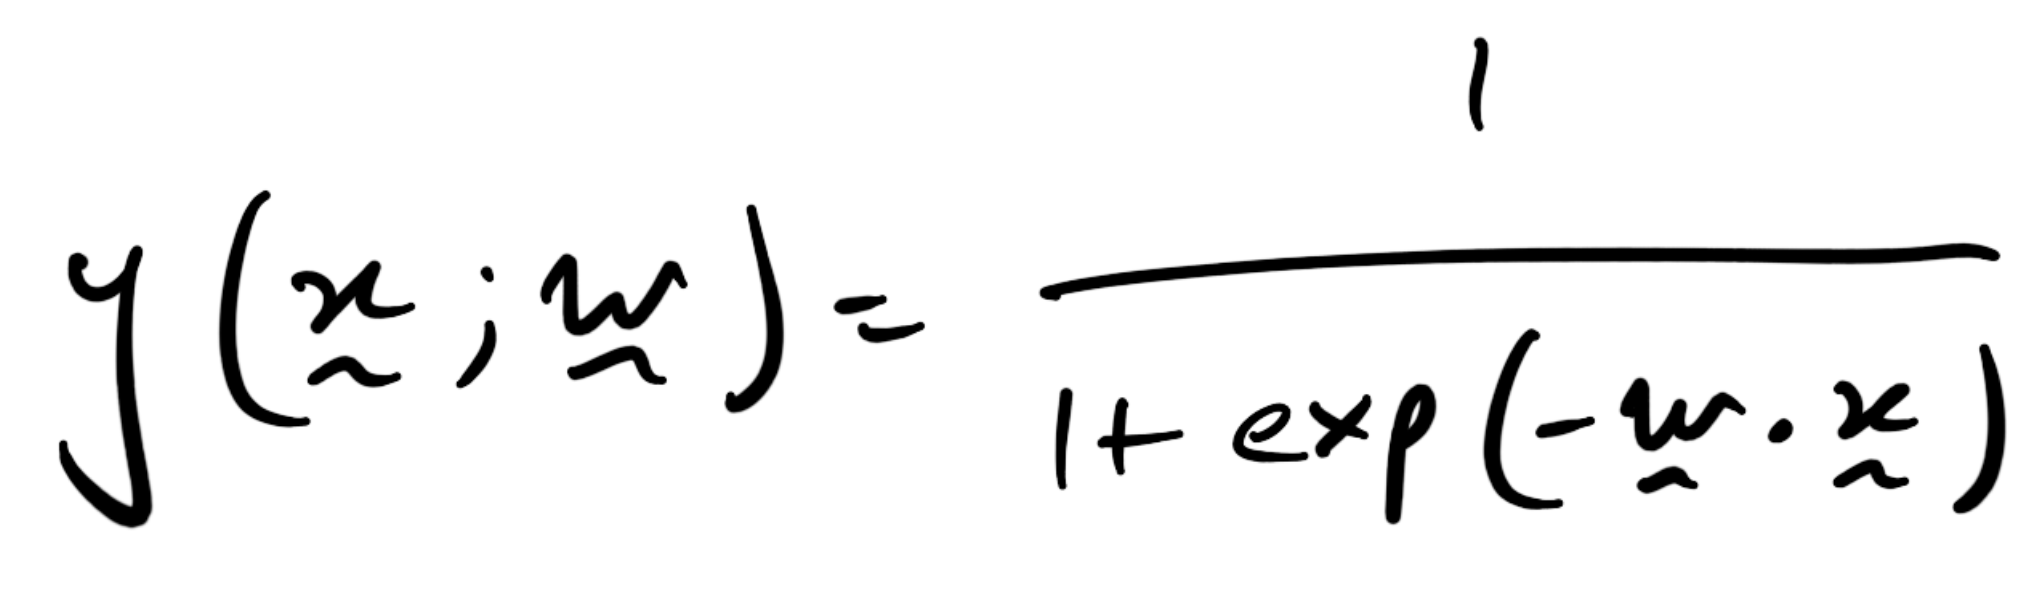

### 1a)
Set up a Python function that implements this model of a neuron.  It should take as input 2D vectors `x` and `w` and return a scalar `y` as defined above.

### 1b)
Check that you have implemented this function correctly by evaluating for a two-input neuron: `x = [1;-1]`, `w = [2,-1]`.

### 1c)
Think about the computation you've just performed: you've weighted the first (positive) input, `x1 = 1` positively (`w1 = 2`), but the second (negative) input, `x2 = -1` negatively (`w2 = -1`).
Should the result of the dot product yield a positive value that yields a value near the maximum of the sigmoid (`1`), or a negative value that yields a value nearer the minimum of the sigmoid (`0`)?

Does your result match your logic?

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 1 Submission</h1></center></span>
<p>Submit your results to 1b to two decimal places.</p>
</div>

### The one-dimensional neuron
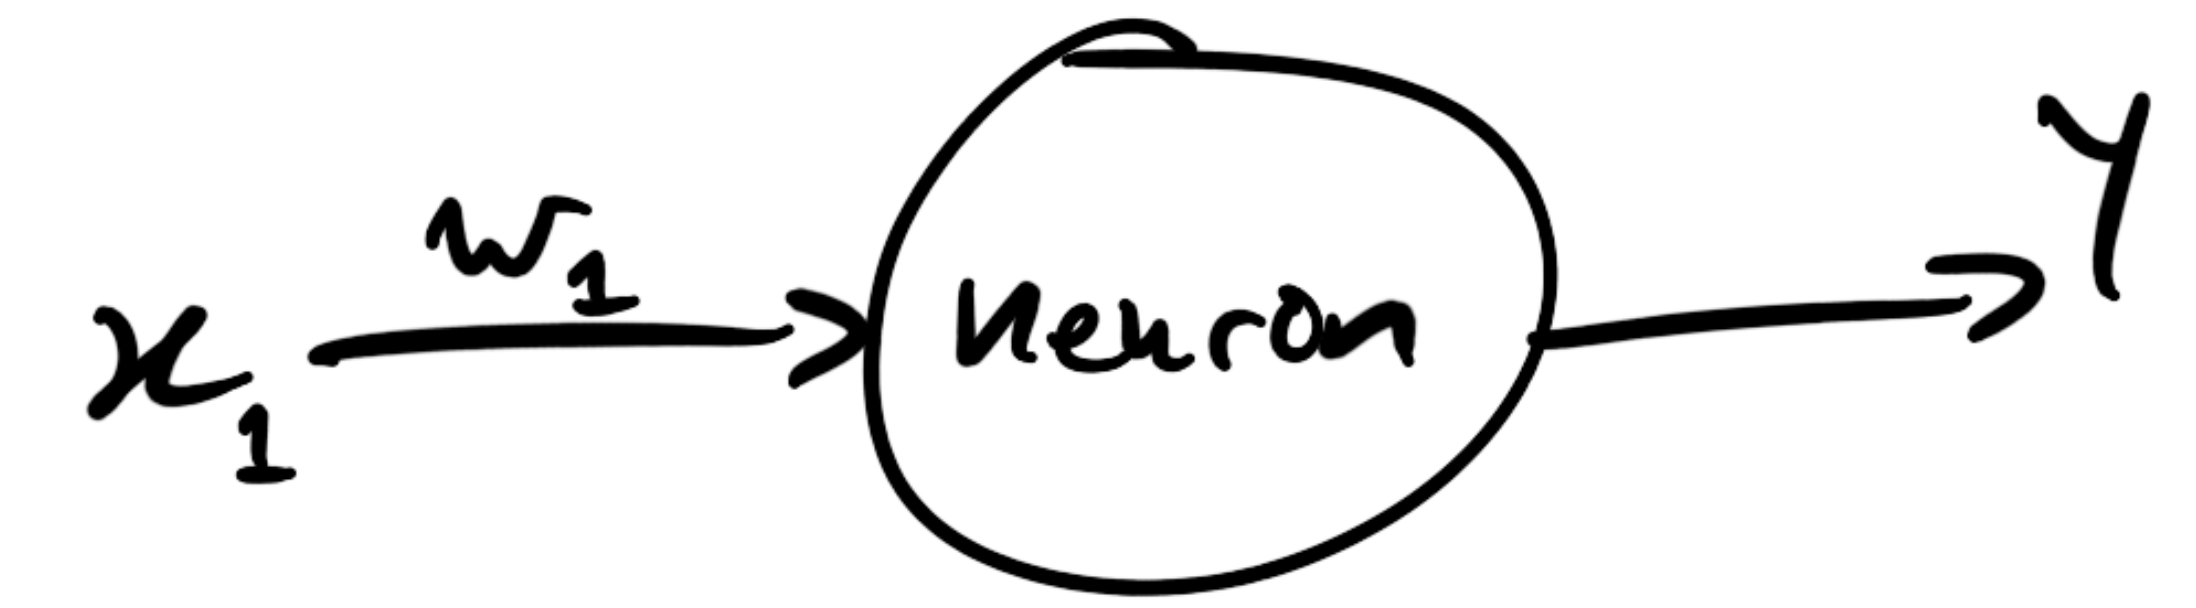

Consider the case where our model neuron has a single input, `x`.
Then we have just a single degree of freedom in determining the neuron's response to that input, through the scalar weight, `w`.


### 2a)
Plot `y` as a function of `x` for some different values of the weight parameter, `w`, sampling both positive and negative values.


- What happens when `w = 0`?
- How does a higher weight magnitude shape the neuron's response to the same input?
- For the same weight magnitude, what does flipping its sign do to the neuron's response to the same input?


### The two-dimensional neuron

Ok, so we understand how setting `w` affects the response of a neuron to a single input.
Today we're going to think more about the behavior of a neuron with two inputs.
In this case, we have the freedom to set two numbers, `w = [w1,w2]`, which determine the neuron's response to its two inputs, `x = [x1,x2]`.
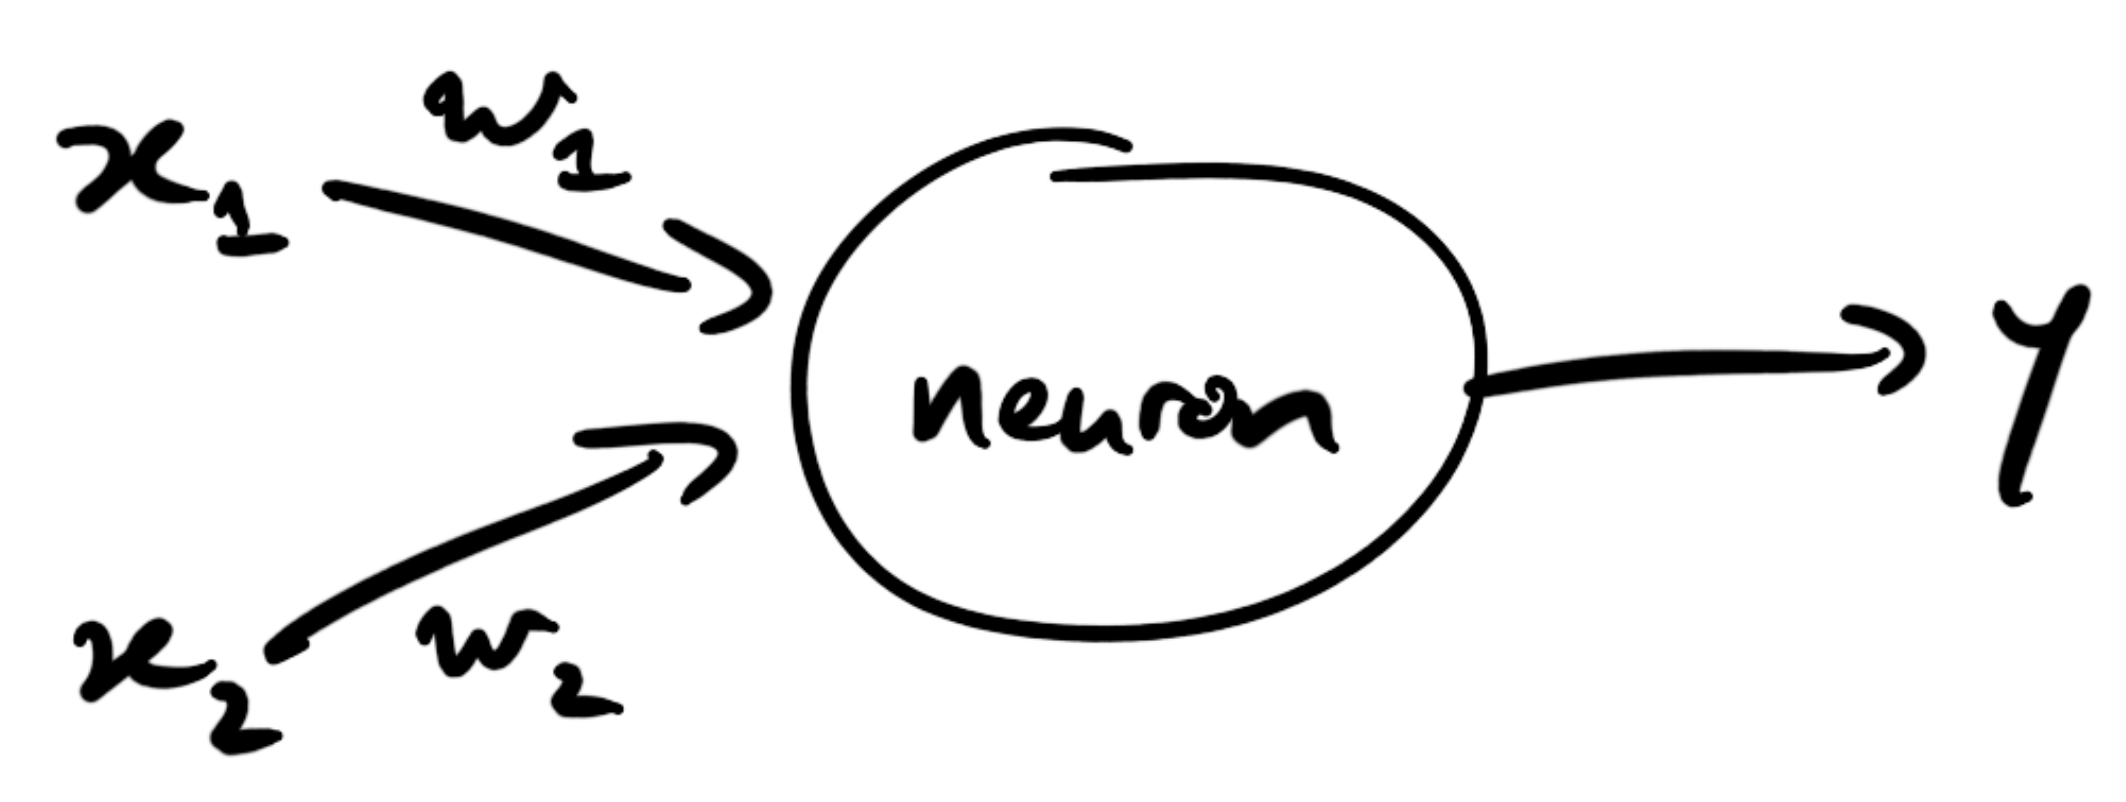

Each point in weight space (defined by two numbers, `w1` and `w2`), now defines a unique function of the two inputs, `x1` and `x2`.
Let's try looking at some of these possible neuron responses as a function of its inputs, at different points in weight space.
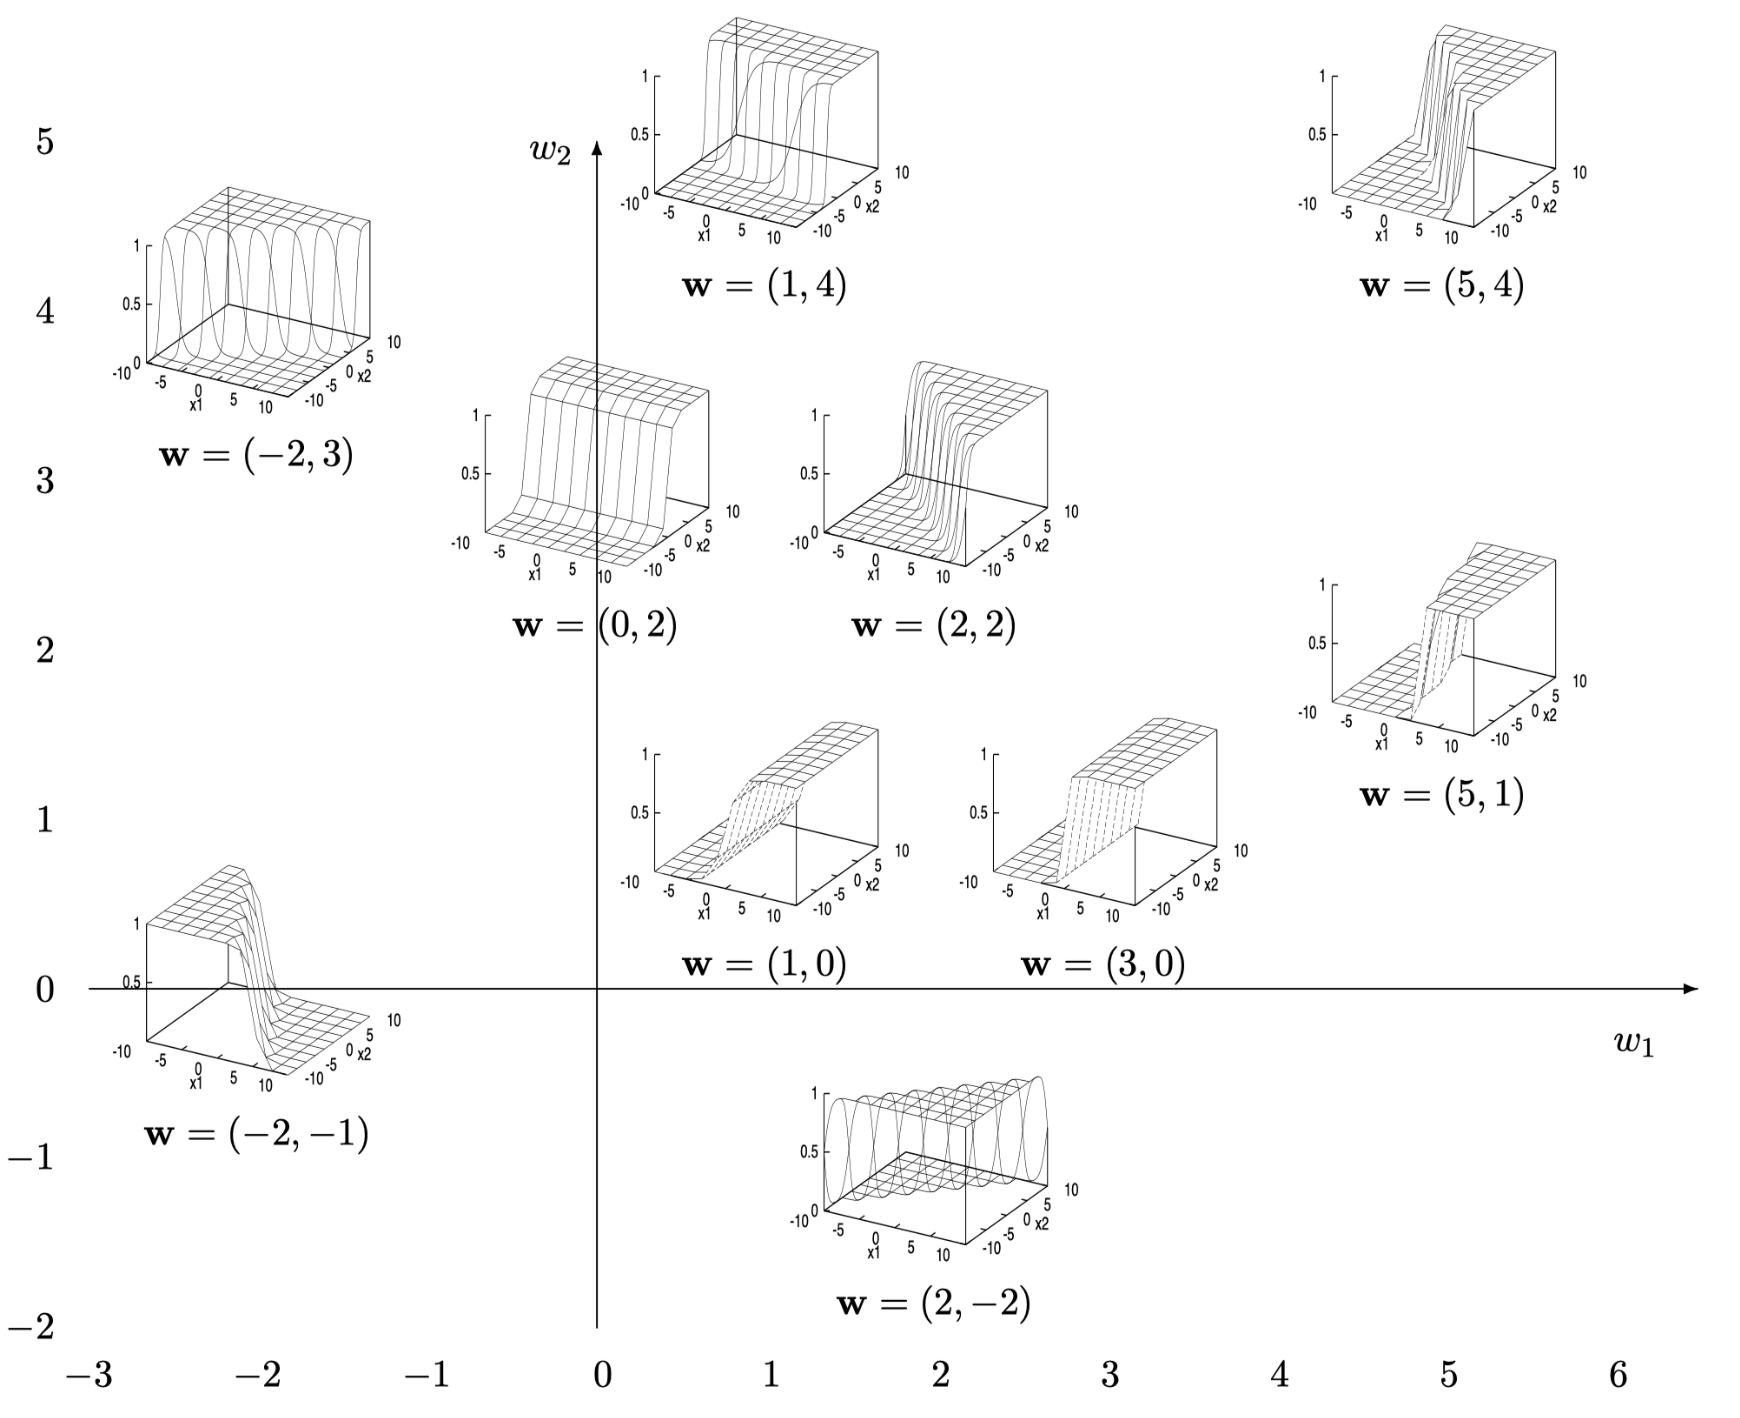



### 2b)
We can plot these surfaces by setting `w`, and then computing the function `y` across a grid in `x1` and `x2`.  In Python we can do this by using the numpy function `meshgrid` to set up 2D arrays, evaluating the function elementwise using these grids (and the values for `w`) and then plotting using a 3D axes package from `matplotlib`.  The axes import and plot functions are provided below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# code required to set up X1, X2 and Y

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X1, X2, Y, rstride=10, cstride=0) 
# cstride=0 makes it a waterfall along the X-axis, 
# play around with the stride parameters
# You can also use ax.plot_surface() to get a colour plot
plt.show()

### 2c)
- When does the neuron tuned to `w = [1,-1]` have minimal output? Maximal output?
- If we set `w = [1,0.2]`, which of the two inputs is the neuron more sensitive to? Plot the neuron's response to inputs for this set of weights to check your intuition.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 2 Submission</h1></center></span>
<p>Submit your figure created in 2c for w = [1,0.2].</p>
</div>

### Training a single neuron to classify inputs into two types

In lectures we found that the process of adjusting weights allows the neuron to learn a desired relationship between inputs and outputs.
We took our first steps towards the machine-learning approach of _supervised learning_, in which a flexible learning structure (like the single neuron) can learn a good input-output mapping from being exposed to a labeled training dataset.

We will consider the case where our neuron is forced to predict whether a person is an 'instagram model' or a 'sports star', from two pieces of information:

1. Number of instagram followers
2. Resting heart rate

Suppose we surveyed a bunch of instagram models and sports stars and assemble the data as a person x feature matrix, `dataMat`, and a binary vector, `isModel`, that labels each row as representing either a sports star (`0`) or an instagram model (`1`).

### 3a)
Load the dataset `Model_sports.csv` using the `pandas` command `read_csv`.  Inspect the dataframe (you can use the `head()` method of the dataframe object).

### 3b)
Create a scatter plot of the data, with the dots corresponding to the models one colour, and the dots for the sports people a different colour.  Some possible code for the plot is provided below.

In [162]:
#colors = ['red' if cat == 0 else 'blue' for cat in df['IsModel']]
#plt.scatter(df['Followers'],df['Heart_rate'],c=colors)

### 3c)
Look at the axes.  Can you see that the number of instagram followers is on a vastly different scale to resting heart rate?

We can put them on a similar scale by applying a _z_-score transformation, which removes the mean and standardizes the variance of both features:
$$ z_{scores} = \frac{(data - mean)}{ std\_dev}$$

Replot the above scatter, using the z scores, verifying that both measurements have indeed been standardized.

Working with the normalised z score data allows us to interpret the relative size of `w` as relative importance scores (independent of the very different scales of the two measurements).

Now looking at the z score scatter data which of the two variables do you think will have higher weight in the trained neuron?


### 3d)
Remember the classification error metric, `G`, that we defined in lectures?

$$G({\bf w}) = -\sum_n [t^{(n)}\ln y({\bf x}^{(n)};{\bf w}) + (1-t^{(n)})\ln (1-y({\bf x}^{(n)};{\bf w}))]$$

This sum can be carried out with a single line in Python, using the Numpy elementwise multiplication of vectors.  Carry out this computation now.  For comparison, I get 17.41615 for `w = [1,1]`.


### 3e)
Create a contour map for the error in the range $w_1 \in [-1,1]$, $w_2 \in [-1,1]$.  Label your axes and include a colorbar so the contours can be interpreted.  For what weights do you see smaller errors, and does this make sense?

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 3 Submission</h1></center></span>
<p>Submit your figure created in 3e.</p>
</div>

## Extension
From an initial weight of $[-1,-1]$ use the update rule discussed in the lectures to evolve the weights until you meet some target error.  What are your final weights, and does this match with what you observed in the contour plot?  Save your intermediate values for the weight and plot these as a series of points on the $w_1 w_2$ plane.

## PART 2: Storing Memories in Hopfield Networks

Recall how a simple Hebbian learning mechanism can allow memories to be stored in networks of connected neurons.
Networks that update weights using a Hebbian learning rule are called Hopfield Networks.

In this tutorial, we're going to attempt to store a total of five memories: the four letters `P`, `H`, `Y`, `S`, and a checkerboard, into a binary Hopfield network.


So that our network can code for the five desired images, we're going to make each neuron be a pixel in 5 x 5 grid, so we'll have a total of 25 neurons in our network.
Recall that in a binary Hopfield network, each neuron's state is either `-1` or `1`.


### Defining memories

Our first step is to define the memories on our 5 x 5 grid.  The memories are defined as follows:
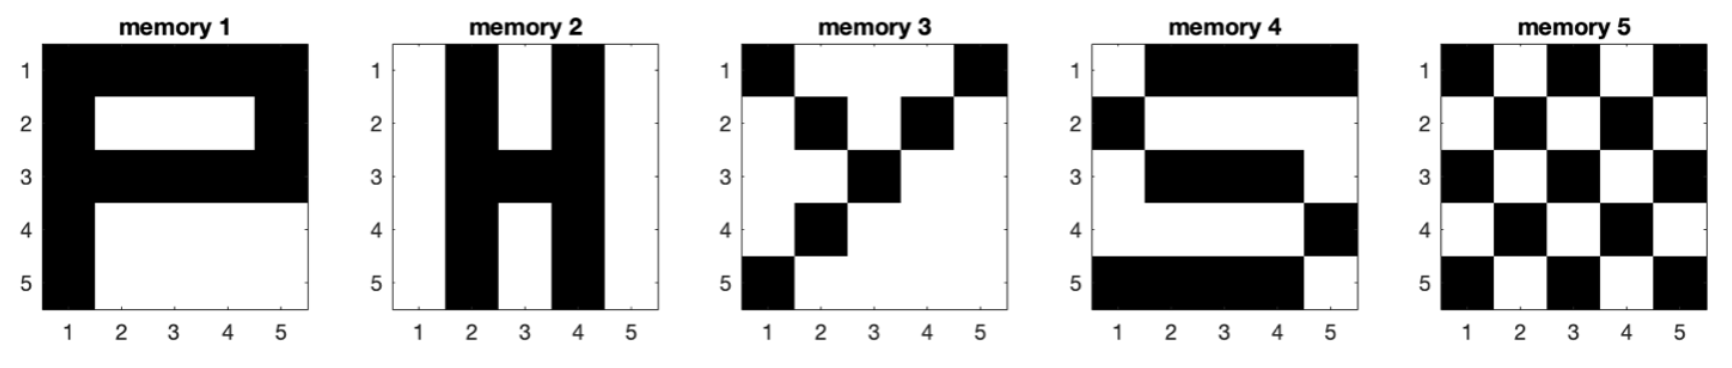

There are many ways we could set this up, but I have coded in one approach to store these memories as 5 x 5 numpy arrays in a list.

In [153]:
memories = list()
# P memory
memory = -np.ones([5,5])
memory[0] = np.ones(5)
memory[2] = np.ones(5)
memory[:,0] = np.ones(5)
memory[1,4] = 1
memories.append(memory)
# H memory
memory = -np.ones([5,5])
memory[:,1] = np.ones(5)
memory[:,3] = np.ones(5)
memory[2,2] = 1
memories.append(memory)
# Y memory
memory = -np.ones([5,5])
flipped_arr = np.fliplr(memory)
np.fill_diagonal(flipped_arr, 1)
memory = np.fliplr(flipped_arr)
memory[0,0] = 1
memory[1,1] = 1
memory[2,2] = 1
memories.append(memory)
# S memory
memory = -np.ones([5,5])
memory[0] = 1
memory[2] = 1
memory[4] = 1
memory[0,0] = -1
memory[1,0] = 1
memory[2,0] = -1
memory[2,4] = -1
memory[3,4] = 1
memory[4,4] = -1
memories.append(memory)
# checkboard memory
memory = -np.ones([5,5])
memory[::2, ::2] = 1  # Set alternate rows (starting from 2nd) and alternate columns to 1
memory[1::2, 1::2] = 1
memories.append(memory)


### 4a)
Check that this has indeed stored the memories correctly, by plotting using `imshow`.  Our goal will be to use these memories to train a set of 25 neurons to 'remember' these different states.  

### Training a Hopfield network

Ok, so now we have our memories specified in the list `memories`.
Now let's train a Hopfield network with a Hebbian learning rule to try to store them.
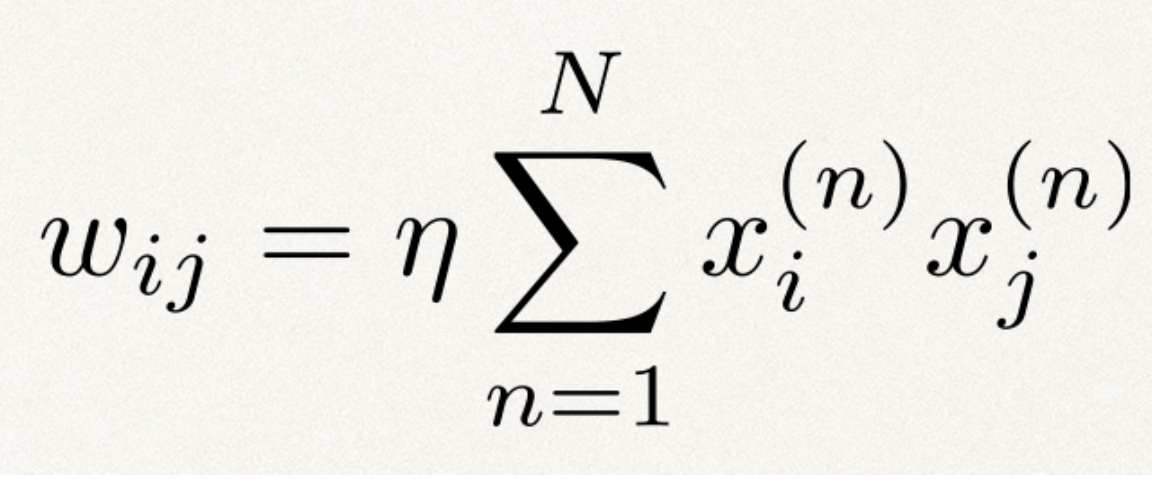


Looking at this Hebbian learning rule you may be able to convince yourself that you can solve this using matrix algebra (with an appropriately defined memory matrix), or you could build the weight matrix by explicitly iterating over the memories.

### 4b)
Print out one of the memories as a 'flattened' 1D array.  How do the array indices in the flattened 1D array correspond to the locations in the 2D array?  Is this a 'row-major' (going across rows) or 'column-major' (going down columns) format?

### 4c)
Run the Hebbian learning rule and look at the weight matrix you obtain.  Display this using the `imshow` command.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 4 Submission</h1></center></span>
<p>Submit a figure showing your weight matrix.</p>
</div>

### 4d)

### Inspecting network weights

Our Hebbian rule is designed to 'wire together' neurons that 'fire together'.
That is, pixels that tend to be on together (or off together) across the memories should now be connected by strong weights.

Let's check whether this actually happened.

Take another look at the memories we're trying to store, displayed as a 5 x 5 grid.

Looking across the five memories, note down neuron indices for:

1. Two neurons that tend to be on together (or off together).
2. Two neurons that tend to be anti-correlated (when one is on the other is off and vice versa).
3. Two neurons with no particular synchronization.

For each of these four pairs, predict what the weight will be in the trained Hopfield network: (i) a high positive weight, (ii) a high negative weight, or (iii) a near-zero weight.

- Test your intuition by checking the corresponding trained weights in `w`.
- Do the values of `w` capture the patterns in the memories?

#### The strongest weights

You can threshold the weights, e.g., as `wStrong = (w > t)`, for some threshold `t`.
This allows you to construct a binary adjacency matrix, `wStrong`, that removes all weights less than the threshold `t`.
Recall from the first module that you can convert a binary adjacency matrix to a graph as `G = nx.from_numpy_array(A)` and plot it by setting up a layout (e.g. `pos = nx.circular_layout(G)`) and then plotting using `nx.draw()`.

Using these techniques, plot a graph containing just the strongest neuron-neuron weights by setting a sensible threshold on `w`.
Can you make sense of the most strongly connected groups of neurons, given the memories that you defined?

Repeat for the most strongly negatively correlated pairs of neurons.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 5 Submission</h1></center></span>
<p>Which set of four neurons have states that are most strongly correlated to each other across the five memories?</p>
</div>

## Extension 
Now that you have a Hopfield network encoding memories, a question is can these memories be recovered through activity in the network?  Using an update scheme discussed in the lectures, outline how you would carry out the experiment starting from a random neuronal activation pattern.
